Business challenge/requirement

FuPont is a leading chemical company across the globe.  The Company is on a CSR (Corporate Social Responsibility) mission. It wants to identify biodegradable products based on a study of the relationships between chemical structure and biodegradation of molecules. You as an ML expert have to create anML model to classify the chemical structure as  'Ready BioDegradable' –RB vs 'Not Ready Biodegradable' –NRB

In [26]:
import pandas as pd
import numpy as np


In [27]:
data=pd.read_csv('bio-degradabale-data.csv',sep=';',header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB


In [28]:
data.shape

(1055, 42)

In [29]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

In [30]:
data[41].unique()

array(['RB', 'NRB'], dtype=object)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=data.drop([41],axis=1)
x_processed=scaler.fit_transform(x)
y=data[41].map({'RB':1,'NRB':0})

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
dt=DecisionTreeClassifier(max_depth=5)
rf=RandomForestClassifier(max_depth=5)
ab=AdaBoostClassifier()
svc=SVC(C=1,kernel='linear')
LG=LogisticRegression(solver='lbfgs', max_iter=1000)

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
x.shape

(1055, 41)

In [35]:
y.shape

(1055,)

In [36]:
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix

In [39]:
dt_score=accuracy_score(Y_test,dt_pred)

In [40]:
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)
rf_score=accuracy_score(Y_test,rf_pred)

In [58]:
ab.fit(X_train,Y_train)
ab_pred=ab.predict(X_test)
ab_score=accuracy_score(Y_test,ab_pred)
ab_score

0.8767772511848341

In [46]:
svc.fit(X_train,Y_train)
svc_pred=svc.predict(X_test)
svc_score=accuracy_score(Y_test,svc_pred)

In [57]:
LG.fit(X_train,Y_train)
LG_pred=LG.predict(X_test)
LG_score=accuracy_score(Y_test,LG_pred)
LG_score

0.8720379146919431

In [54]:
label=['Logistic Regression','Decision Tree','Random Forest','SVC','Adaboost']
scores=[LG_score,dt_score,rf_score,svc_score,ab_score]

<BarContainer object of 5 artists>

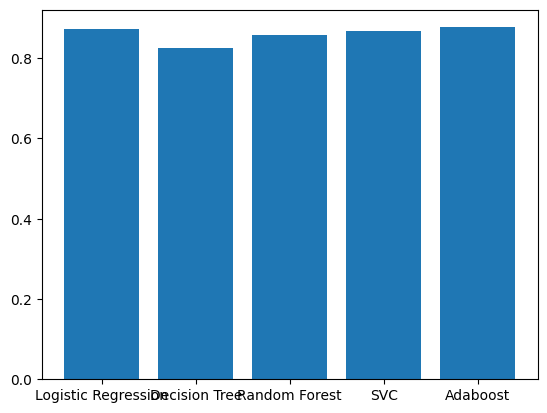

In [56]:
import matplotlib.pyplot as plt
plt.bar(label,scores)